### Analisis Pengaruh Faktor-Faktor Lingkungan terhadap Produktivitas Tanaman Padi di Provinsi Sumatera Menggunakan Model Seemingly Unrelated Regression (SUR)

### Import library

In [10]:
import numpy as np
import pandas as pd
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.regression.linear_model import OLS
from statsmodels.sandbox.sysreg import SUR
from linearmodels.system import SUR
from linearmodels.system import SUR
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Memanggil dataset

In [3]:
data = pd.read_csv('C:/Users/ekyfe/Documents/college/Semester 5/Ekonometrika terapan/Project SUR/Dataset/Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


### Menampilkan info dataset

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB
None


### Menampilkan deskriptif statistik dari dataset

In [5]:
print(data.describe())

             Tahun      Produksi     Luas Panen  Curah hujan  Kelembapan  \
count   224.000000  2.240000e+02     224.000000   224.000000  224.000000   
mean   2006.500000  1.679701e+06  374349.966920  2452.490759   80.948705   
std       8.095838  1.161387e+06  232751.161987  1031.972625    4.878680   
min    1993.000000  4.293800e+04   63142.040000   222.500000   54.200000   
25%    1999.750000  5.488570e+05  146919.500000  1703.525000   78.975000   
50%    2006.500000  1.667773e+06  373551.500000  2315.700000   82.375000   
75%    2013.250000  2.436851e+06  514570.250000  3039.700000   84.000000   
max    2020.000000  4.881089e+06  872737.000000  5522.000000   90.600000   

       Suhu rata-rata  
count      224.000000  
mean        26.801964  
std          1.197041  
min         22.190000  
25%         26.177500  
50%         26.730000  
75%         27.200000  
max         29.850000  


### Distribusi variable

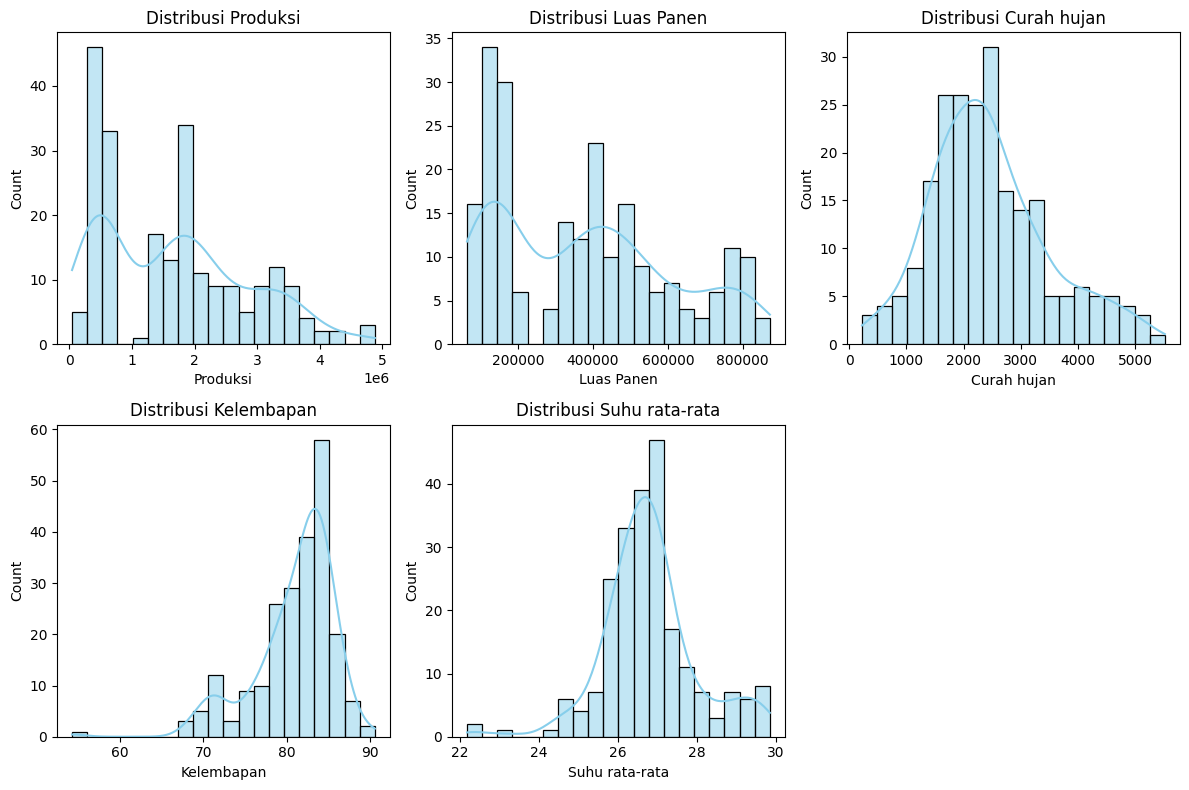

In [11]:
numeric_cols = ['Produksi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

### Korelasi antar variable

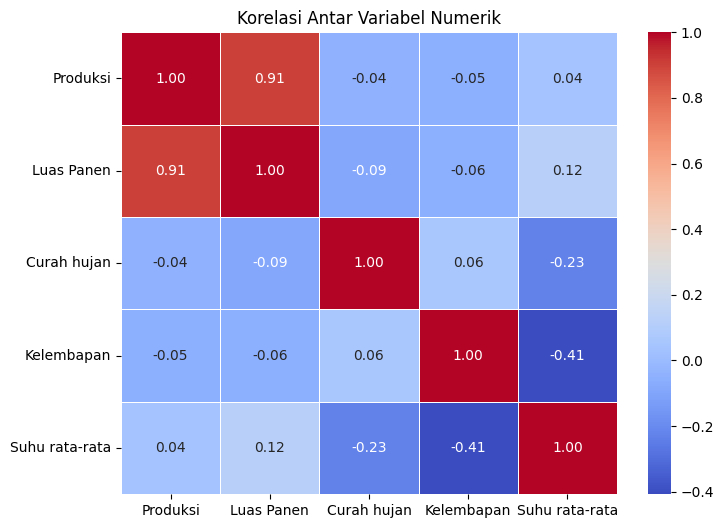

In [12]:
corr = data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


### Menentukan formula

In [6]:
formula_eq1 = "Produksi ~ 1 + Q('Luas Panen') + Q('Curah hujan')"
formula_eq2 = "Produksi ~ 1 + Q('Kelembapan') + Q('Suhu rata-rata')"

### Menggabungkan persamaan

In [7]:
equations = {
    'Eq1': formula_eq1,
    'Eq2': formula_eq2
}

### Melakukan fitting model sur

In [8]:
sur_model = SUR.from_formula(equations, data)
sur_results = sur_model.fit()

### Menampilkan ringkasan model

In [9]:
print(sur_results)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.3984
No. Equations.:                     2   McElroy's R-squared:                 0.6765
No. Observations:                 224   Judge's (OLS) R-squared:             0.3984
Date:                Fri, Nov 29 2024   Berndt's R-squared:              -7.992e+14
Time:                        15:26:35   Dhrymes's R-squared:                 0.3984
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: Eq1, Dependent Variable: Produksi                     
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
Intercept         1.962e+05  6.252e+04     3.1382     0.0017   7.366e+04 